In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Data augmentation
train_datagen = ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, validation_split=0.2)

# Training and validation generators
train_generator = train_datagen.flow(x_train, y_train, batch_size=64, subset='training')
validation_generator = train_datagen.flow(x_train, y_train, batch_size=64, subset='validation')

In [ ]:
# Load ResNet50 model pre-trained on ImageNet, exclude the top fully connected layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(10, activation='softmax')(x)  # Output layer for 10 classes (CIFAR-10)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 65ms/step - accuracy: 0.1764 - loss: 2.2408 - val_accuracy: 0.2486 - val_loss: 2.0493
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 55ms/step - accuracy: 0.2632 - loss: 2.0263 - val_accuracy: 0.2914 - val_loss: 1.9786
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - accuracy: 0.2838 - loss: 1.9669 - val_accuracy: 0.2986 - val_loss: 1.9442
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.3035 - loss: 1.9290 - val_accuracy: 0.3002 - val_loss: 1.8973
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.3135 - loss: 1.8974 - val_accuracy: 0.3433 - val_loss: 1.8593
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 61ms/step - accuracy: 0.3206 - loss: 1.8786 - val_accuracy: 0.3219 - val_loss: 1.8611
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.3300 - loss: 1.8586 - val_accuracy: 0.3275 - val_loss: 1.8542
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 55ms/step - accuracy: 0.3368 - loss: 1.8411 - val_accurac

In [ ]:
# Unfreeze the last 10 layers of the base model for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with fine-tuning
history_finetune = model.fit(train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 63ms/step - accuracy: 0.2471 - loss: 2.6335 - val_accuracy: 0.2952 - val_loss: 2.0010
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.3184 - loss: 1.9412 - val_accuracy: 0.3461 - val_loss: 1.8596
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 56ms/step - accuracy: 0.3417 - loss: 1.8506 - val_accuracy: 0.3661 - val_loss: 1.7982
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.3646 - loss: 1.7998 - val_accuracy: 0.3669 - val_loss: 1.7838
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.3702 - loss: 1.7554 - val_accuracy: 0.3801 - val_loss: 1.7468


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build a simple CNN model
model_scratch = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes (CIFAR-10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the custom CNN model
model_scratch.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_scratch = model_scratch.fit(train_generator, validation_data=validation_generator, epochs=20)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 52ms/step - accuracy: 0.2694 - loss: 1.9422 - val_accuracy: 0.4579 - val_loss: 1.4534
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.4744 - loss: 1.4494 - val_accuracy: 0.5182 - val_loss: 1.3013
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.5328 - loss: 1.3038 - val_accuracy: 0.5826 - val_loss: 1.1974
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.5840 - loss: 1.1693 - val_accuracy: 0.6076 - val_loss: 1.1076
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.6119 - loss: 1.1007 - val_accuracy: 0.6322 - val_loss: 1.0456
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.6346 - loss: 1.0377 - val_accuracy: 0.6501 - val_loss: 1.0148
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.6450 - loss: 1.0126 - val_accuracy: 0.6697 - val_loss: 0.9374
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.6599 - loss: 0.9697 - 

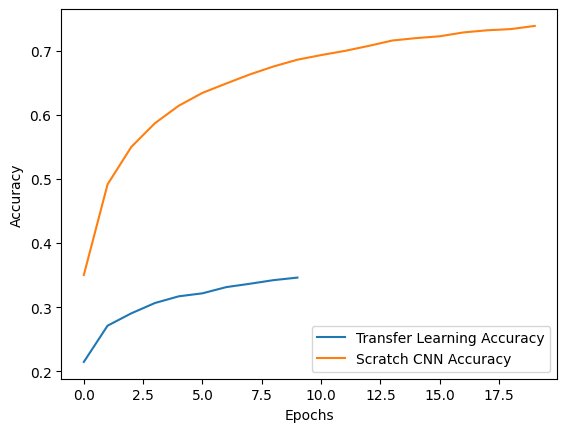

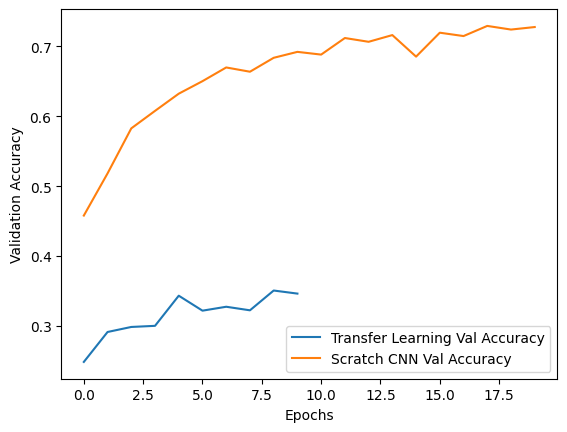

In [ ]:
# Plot accuracy comparison
plt.plot(history.history['accuracy'], label='Transfer Learning Accuracy')
plt.plot(history_scratch.history['accuracy'], label='Scratch CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot validation accuracy comparison
plt.plot(history.history['val_accuracy'], label='Transfer Learning Val Accuracy')
plt.plot(history_scratch.history['val_accuracy'], label='Scratch CNN Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate transfer learning model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Transfer Learning Model Test Accuracy: {test_acc}")

# Evaluate the model trained from scratch
test_loss_scratch, test_acc_scratch = model_scratch.evaluate(x_test, y_test)
print(f"Scratch Model Test Accuracy: {test_acc_scratch}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.3934 - loss: 1.7193
Transfer Learning Model Test Accuracy: 0.391400009393692
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7428 - loss: 0.7460
Scratch Model Test Accuracy: 0.7425000071525574


1. Transfer Learning Model (ResNet50)
Test Accuracy: 39.34%
Training Accuracy Plateau: At around 0.30, as seen in the graph.
Validation Accuracy Plateau: Around 0.35 after several epochs.
Loss: 1.7193 (higher than the scratch model).
2. CNN Model Trained from Scratch
Test Accuracy: 74.28%
Training Accuracy: Gradually increases to over 70%.
Validation Accuracy: Gradually increases to over 65–70%.
Loss: 0.7460 (significantly lower than transfer learning).